In [1]:
!nvidia-smi

Mon Aug 23 11:12:25 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.80.02    Driver Version: 450.80.02    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-PCIE...  Off  | 00000000:00:05.0 Off |                  Off |
| N/A   33C    P0    35W / 250W |      0MiB / 32510MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [25]:
import os
import pandas as pd
from PIL import Image
from IPython.display import Image as pyimage 
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def dirlister(root: str, meta: pd.DataFrame, mode = 'train')->list:
    mode_dict = {'train': 'path', 'sub':'ImageID'}
    image_dirs = [os.path.join(root,'images', x) for x in meta[mode_dict[mode]].values]
    if mode == 'train':
        image_path = []
        for dir in image_dirs:
            for filenames in os.listdir(dir):
                tmp = os.path.join(dir, filenames)
                if os.path.isfile(tmp) and '._' not in tmp:
                    image_path.append(tmp)
                    
    else:
        return image_dirs
        
    return image_path

In [27]:
TRAIN_DATA_ROOT = '/opt/ml/input/data/train/'
SUB_DATA_ROOT = '/opt/ml/input/data/eval/'

In [28]:
train_meta = pd.read_csv(os.path.join(TRAIN_DATA_ROOT, 'train.csv'))
sub_meta = pd.read_csv(os.path.join(EVAL_DATA_ROOT, 'info.csv'))

In [29]:
train_dir = dirlister(TRAIN_DATA_ROOT, train_meta)
sub_dir = dirlister(EVAL_DATA_ROOT, sub_meta, mode = 'sub')

In [30]:
len(train_dir)

18900

In [31]:
train_dir[0:10]

['/opt/ml/input/data/train/images/000001_female_Asian_45/incorrect_mask.jpg',
 '/opt/ml/input/data/train/images/000001_female_Asian_45/mask5.jpg',
 '/opt/ml/input/data/train/images/000001_female_Asian_45/mask3.jpg',
 '/opt/ml/input/data/train/images/000001_female_Asian_45/mask2.jpg',
 '/opt/ml/input/data/train/images/000001_female_Asian_45/mask4.jpg',
 '/opt/ml/input/data/train/images/000001_female_Asian_45/normal.jpg',
 '/opt/ml/input/data/train/images/000001_female_Asian_45/mask1.jpg',
 '/opt/ml/input/data/train/images/000002_female_Asian_52/incorrect_mask.jpg',
 '/opt/ml/input/data/train/images/000002_female_Asian_52/mask5.jpg',
 '/opt/ml/input/data/train/images/000002_female_Asian_52/mask3.jpg']

In [32]:
sub_dir[0:10]

['/opt/ml/input/data/eval/images/cbc5c6e168e63498590db46022617123f1fe1268.jpg',
 '/opt/ml/input/data/eval/images/0e72482bf56b3581c081f7da2a6180b8792c7089.jpg',
 '/opt/ml/input/data/eval/images/b549040c49190cedc41327748aeb197c1670f14d.jpg',
 '/opt/ml/input/data/eval/images/4f9cb2a045c6d5b9e50ad3459ea7b791eb6e18bc.jpg',
 '/opt/ml/input/data/eval/images/248428d9a4a5b6229a7081c32851b90cb8d38d0c.jpg',
 '/opt/ml/input/data/eval/images/7953c2e6e983bad91b89a0e4ad7eb69e6e43e56b.jpg',
 '/opt/ml/input/data/eval/images/1903db7dcc1262d0441677afa422e6a8371e5b37.jpg',
 '/opt/ml/input/data/eval/images/441419a874f4d031cd576850b68539ca7d35bedf.jpg',
 '/opt/ml/input/data/eval/images/388856cd1ef99b1918273a827a75f2aff2478321.jpg',
 '/opt/ml/input/data/eval/images/795ba8ccc769a3f9da6a897f75df6706b729345b.jpg']

In [33]:
len(sub_dir)

12600

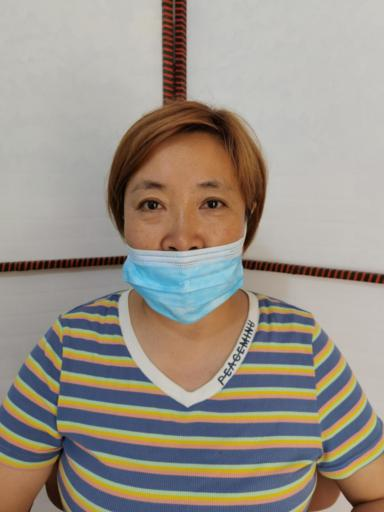

/opt/ml/input/data/train/images/000001_female_Asian_45/incorrect_mask.jpg


In [90]:
pil_img = pyimage(train_dir[0])
display(pil_img)
print(train_dir[0])

In [91]:
img = Image.open(train_dir[0])

In [92]:
img.width, img.height

(384, 512)

In [93]:
r = np.unique(np.array(img.getchannel(0)), return_counts = True)

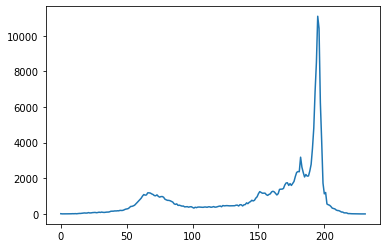

In [94]:
plt.plot(r[0], r[1])

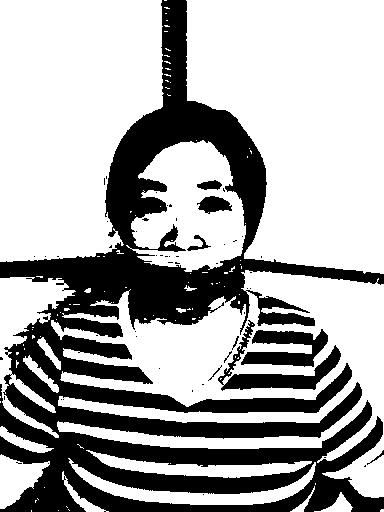

In [95]:
r_arr = np.array(img.getchannel(0)) 
r_arr[r_arr <= 150] = 0
r_arr[r_arr > 150] = 255
#r_arr[r_arr > 200] = 0
display(Image.fromarray(r_arr))

In [96]:
np.unique(r_arr, return_counts= True)

(array([  0, 255], dtype=uint8), array([ 65185, 131423]))

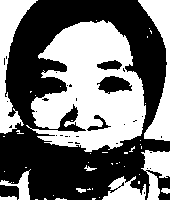

In [104]:
display(Image.fromarray(r_arr[120:320, 100:270]))

In [105]:
r_crop = np.unique(r_arr[120:320, 100:270], return_counts= True)
r_crop[1], r_crop[0]

(array([18615, 15385]), array([  0, 255], dtype=uint8))

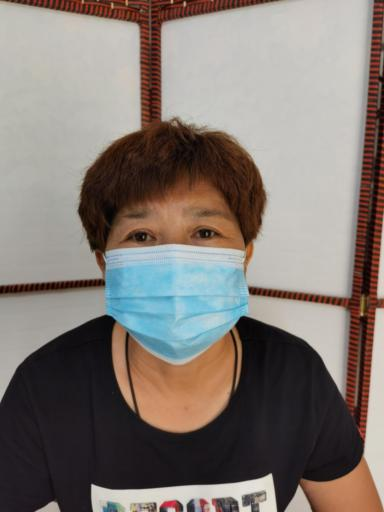

/opt/ml/input/data/train/images/000002_female_Asian_52/mask2.jpg


In [106]:
pil_img = pyimage(train_dir[10])
display(pil_img)
print(train_dir[10])

In [107]:
img = Image.open(train_dir[10])

In [108]:
img.width, img.height

(384, 512)

In [109]:
r = np.unique(np.array(img.getchannel(0)), return_counts = True)

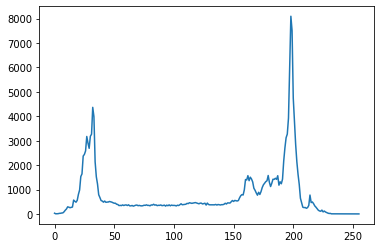

In [110]:
plt.plot(r[0], r[1])

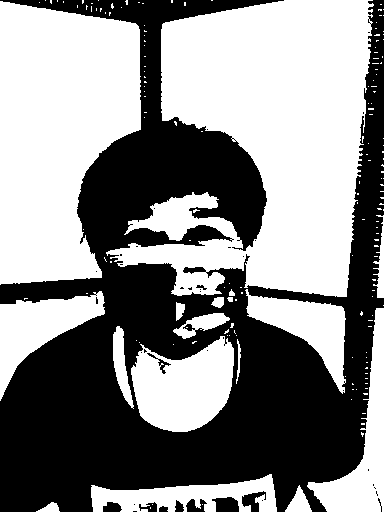

In [111]:
r_arr = np.array(img.getchannel(0)) 
r_arr[r_arr <= 150] = 0
r_arr[r_arr > 150] = 255
#r_arr[r_arr > 200] = 0
display(Image.fromarray(r_arr))

In [112]:
np.unique(r_arr, return_counts= True)

(array([  0, 255], dtype=uint8), array([ 90580, 106028]))

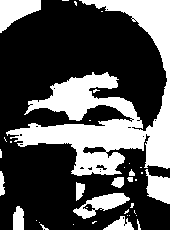

In [115]:
display(Image.fromarray(r_arr[120:350, 100:270]))

In [117]:
r_crop = np.unique(r_arr[120:350, 100:270], return_counts= True)
r_crop[1], r_crop[0]

(array([26158, 12942]), array([  0, 255], dtype=uint8))

흑백 비율로 마스크 불량착용 여부를 pesudo labeling할 수 있을 것 같긴 하다(얼굴 사진만 가져올 시)
혹은 추가 피쳐로 사용 가능할 수도 있을 듯 하다

In [48]:
train_meta.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,2700.0,37.708148,16.985904,18.0,20.0,36.0,55.0,60.0


In [49]:
train_meta.head()

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59


In [50]:
train_meta.gender.value_counts()    #남녀 성비도 불균형

female    1658
male      1042
Name: gender, dtype: int64

In [53]:
train_meta.race.value_counts()

Asian    2700
Name: race, dtype: int64

In [55]:
train_meta.path.value_counts().shape

(2700,)

In [52]:
incorrect_count = len([x for x in image_path if 'incorrect_mask' in x])
correct_count = len([x for x in image_path if '/mask' in x])
nomask_count = len([x for x in image_path if 'normal' in x])
print(incorrect_count, correct_count, nomask_count)

2700 13500 2700


In [ ]:
#스카프도 마스크